In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _),(x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)
autoencoder = Model(input_img, decoded)

In [ ]:
from keras.optimizers import Adam
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history = autoencoder.fit(x_train_noisy, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test_noisy, x_test))
evaluation = autoencoder.evaluate(x_test_noisy, x_test)
print("Test Loss:", evaluation)

NameError: name 'x_test_noisy' is not defined

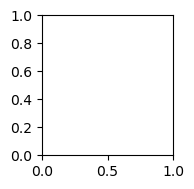

In [12]:
import matplotlib.pyplot as plt
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

   
    ax = plt.subplot(2, n, i + 1 + n)
    decoded_imgs = autoencoder.predict(x_test_noisy[i:i+1])
    plt.imshow(decoded_imgs.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()